<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
! git clone 'https://github.com/Badar97/Progetto_DataScience'

fatal: destination path 'Progetto_DataScience' already exists and is not an empty directory.


In [14]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import random

import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [16]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo#.head()

Unnamed: 0   sourceId   latitude  longtitude  \
0                0      SN100  61.134900   12.503900   
1                1     SN1135  58.990000   11.540800   
2                2  SN1151800  50.100278   14.255556   
3                3    SN15262  61.674000    8.368500   
4                4  SN1531000  45.473056   28.032222   
...            ...        ...        ...         ...   
237624      237624    SN50110  60.337200    6.217500   
237625      237625    SN98978  70.335700   28.964800   
237626      237626   SN299300  60.301111   19.131389   
237627      237627    SN50110  60.337200    6.217500   
237628      237628    SN98978  70.335700   28.964800   

        max(air_temperature P1D)  max(relative_humidity P1D)  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   
...                          ...                         ...   
237624                       NaN                         NaN   
237625                    -11.25                        89.0   
237626                       NaN                         NaN   
237627                       NaN                         NaN   
237628                     -7.00                        94.0   

        max(wind_speed P1D)  mean(air_temperature P1D)  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
...                     ...                        ...   
237624                  NaN                        NaN   
237625                  2.6                     -12.45   
237626                  NaN                        NaN   
237627                  NaN                        NaN   
237628                  NaN                     -10.90   

        mean(relative_humidity P1D)  mean(wind_speed P1D)  \
0                               NaN                   NaN   
1                               NaN                   NaN   
2                               NaN                   NaN   
3                               NaN                   NaN   
4                               NaN                   NaN   
...                             ...                   ...   
237624                          NaN                   NaN   
237625                         89.0                   1.8   
237626                          NaN                   NaN   
237627                          NaN                   NaN   
237628                         91.0                   NaN   

        sum(precipitation_amount P1D)  day  month  year  
0                                 0.4    1      1  2010  
1                                 NaN    1      1  2010  
2                                 NaN    1      1  2010  
3                                 NaN    1      1  2010  
4                                 NaN    1      1  2010  
...                               ...  ...    ...   ...  
237624                            NaN   29     12  2021  
237625                            NaN   29     12  2021  
237626                            NaN   30     12  2021  
237627                            NaN   30     12  2021  
237628                            NaN   30     12  2021  

[237629 rows x 14 columns]

In [17]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237629 entries, 0 to 237628
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     237629 non-null  int64  
 1   sourceId                       237629 non-null  object 
 2   latitude                       237629 non-null  float64
 3   longtitude                     237629 non-null  float64
 4   max(air_temperature P1D)       44766 non-null   float64
 5   max(relative_humidity P1D)     36965 non-null   float64
 6   max(wind_speed P1D)            35260 non-null   float64
 7   mean(air_temperature P1D)      63551 non-null   float64
 8   mean(relative_humidity P1D)    37411 non-null   float64
 9   mean(wind_speed P1D)           35260 non-null   float64
 10  sum(precipitation_amount P1D)  107937 non-null  float64
 11  day                            237629 non-null  int64  
 12  month                         

In [18]:
dropp = ['Unnamed: 0']
meteo.drop(dropp, inplace=True, axis=1)
meteo.head()

sourceId   latitude  longtitude  max(air_temperature P1D)  \
0      SN100  61.134900   12.503900                       NaN   
1     SN1135  58.990000   11.540800                       NaN   
2  SN1151800  50.100278   14.255556                       NaN   
3    SN15262  61.674000    8.368500                       NaN   
4  SN1531000  45.473056   28.032222                       NaN   

   max(relative_humidity P1D)  max(wind_speed P1D)  mean(air_temperature P1D)  \
0                         NaN                  NaN                        NaN   
1                         NaN                  NaN                        NaN   
2                         NaN                  NaN                        NaN   
3                         NaN                  NaN                        NaN   
4                         NaN                  NaN                        NaN   

   mean(relative_humidity P1D)  mean(wind_speed P1D)  \
0                          NaN                   NaN   
1                          NaN                   NaN   
2                          NaN                   NaN   
3                          NaN                   NaN   
4                          NaN                   NaN   

   sum(precipitation_amount P1D)  day  month  year  
0                            0.4    1      1  2010  
1                            NaN    1      1  2010  
2                            NaN    1      1  2010  
3                            NaN    1      1  2010  
4                            NaN    1      1  2010

In [19]:
meteo = meteo.dropna()
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21799 entries, 34 to 235248
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sourceId                       21799 non-null  object 
 1   latitude                       21799 non-null  float64
 2   longtitude                     21799 non-null  float64
 3   max(air_temperature P1D)       21799 non-null  float64
 4   max(relative_humidity P1D)     21799 non-null  float64
 5   max(wind_speed P1D)            21799 non-null  float64
 6   mean(air_temperature P1D)      21799 non-null  float64
 7   mean(relative_humidity P1D)    21799 non-null  float64
 8   mean(wind_speed P1D)           21799 non-null  float64
 9   sum(precipitation_amount P1D)  21799 non-null  float64
 10  day                            21799 non-null  int64  
 11  month                          21799 non-null  int64  
 12  year                           21799 non-nul

In [20]:
meteo.shape

(21799, 13)

In [21]:
meteo.columns

Index(['sourceId', 'latitude', 'longtitude', 'max(air_temperature P1D)',
       'max(relative_humidity P1D)', 'max(wind_speed P1D)',
       'mean(air_temperature P1D)', 'mean(relative_humidity P1D)',
       'mean(wind_speed P1D)', 'sum(precipitation_amount P1D)', 'day', 'month',
       'year'],
      dtype='object')

In [22]:
newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)
meteo.head()

sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
34  SN69100   63.4597    10.9305                 -2.3                83.0   
40  SN91380   69.3875    20.2823                 -9.2                86.0   
41  SN91740   69.7887    20.9553                 -8.4                72.0   
80  SN69100   63.4597    10.9305                -13.4                84.0   
86  SN91380   69.3875    20.2823                 -8.7                79.0   

    max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
34                    4.1                 -8.50                 79.0   
40                    5.1                -11.75                 71.0   
41                    8.9                -10.90                 67.0   
80                    4.6                -15.15                 82.0   
86                    3.3                -12.35                 73.0   

    mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  
34                     3.0                      0.00    1      1  2010  
40                     2.6                      0.30    1      1  2010  
41                     6.9                      0.00    1      1  2010  
80                     3.6                      0.00    2      1  2010  
86                     2.3                      0.15    2      1  2010

In [23]:
elem = meteo.sourceID.value_counts().count()
print('num of sourceID is: '+str(elem))
meteo['sourceID'].value_counts()


num of sourceID is: 7


SN69100    4360
SN61630    4325
SN91380    4207
SN91740    3222
SN16400    2472
SN32240    1833
SN50110    1380
Name: sourceID, dtype: int64

In [24]:
meteo['sourceID'].unique()

array(['SN69100', 'SN91380', 'SN91740', 'SN61630', 'SN32240', 'SN16400',
       'SN50110'], dtype=object)

In [25]:
"""
df = pd.read_csv(url)
df = df.dropna()
df.drop(df.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
df.drop(df.iloc[:, 2:13], inplace=True, axis=1)
arr = df.value_counts().rename_axis('sourceID').reset_index(name='counts')
labels = arr.sourceID
"""

"\ndf = pd.read_csv(url)\ndf = df.dropna()\ndf.drop(df.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)\ndf.drop(df.iloc[:, 2:13], inplace=True, axis=1)\narr = df.value_counts().rename_axis('sourceID').reset_index(name='counts')\nlabels = arr.sourceID\n"

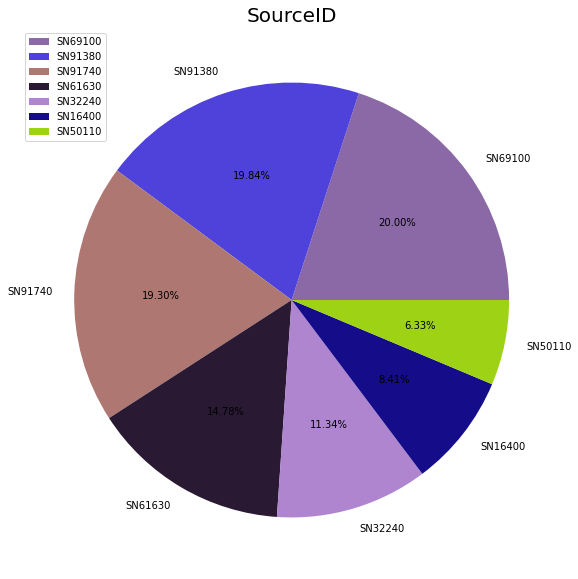

In [26]:
arr = meteo['sourceID'].unique()
labels = arr.tolist()

size = meteo['sourceID'].value_counts()
#colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             #for i in range(7)]
colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]

plt.figure(figsize=(10,10))
plt.pie(size, colors=colors(7), labels=labels, autopct='%.2f%%')
plt.title('SourceID', fontsize=20)
plt.axis('off')
plt.legend()
plt.show(block=False)
plt.pause(3)
plt.close()

In [27]:
geometry = [Point(xy) for xy in zip(meteo.Longitude, meteo.Latitude)]
meteo['geometry'] = geometry
crs = {'init': 'epsg:4326'}
meteo_locs = gpd.GeoDataFrame(meteo, crs=crs, geometry=geometry)
meteo_locs.head()

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
34  SN69100   63.4597    10.9305                 -2.3                83.0   
40  SN91380   69.3875    20.2823                 -9.2                86.0   
41  SN91740   69.7887    20.9553                 -8.4                72.0   
80  SN69100   63.4597    10.9305                -13.4                84.0   
86  SN91380   69.3875    20.2823                 -8.7                79.0   

    max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
34                    4.1                 -8.50                 79.0   
40                    5.1                -11.75                 71.0   
41                    8.9                -10.90                 67.0   
80                    4.6                -15.15                 82.0   
86                    3.3                -12.35                 73.0   

    mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  \
34                     3.0                      0.00    1      1  2010   
40                     2.6                      0.30    1      1  2010   
41                     6.9                      0.00    1      1  2010   
80                     3.6                      0.00    2      1  2010   
86                     2.3                      0.15    2      1  2010   

                     geometry  
34  POINT (10.93050 63.45970)  
40  POINT (20.28230 69.38750)  
41  POINT (20.95530 69.78870)  
80  POINT (10.93050 63.45970)  
86  POINT (20.28230 69.38750)

In [28]:
cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
#meteo.drop(cols, inplace=True, axis=1)
meteo.head()

sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
34  SN69100   63.4597    10.9305                 -2.3                83.0   
40  SN91380   69.3875    20.2823                 -9.2                86.0   
41  SN91740   69.7887    20.9553                 -8.4                72.0   
80  SN69100   63.4597    10.9305                -13.4                84.0   
86  SN91380   69.3875    20.2823                 -8.7                79.0   

    max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
34                    4.1                 -8.50                 79.0   
40                    5.1                -11.75                 71.0   
41                    8.9                -10.90                 67.0   
80                    4.6                -15.15                 82.0   
86                    3.3                -12.35                 73.0   

    mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  \
34                     3.0                      0.00    1      1  2010   
40                     2.6                      0.30    1      1  2010   
41                     6.9                      0.00    1      1  2010   
80                     3.6                      0.00    2      1  2010   
86                     2.3                      0.15    2      1  2010   

                     geometry       Date  
34  POINT (10.93050 63.45970) 2010-01-01  
40  POINT (20.28230 69.38750) 2010-01-01  
41  POINT (20.95530 69.78870) 2010-01-01  
80  POINT (10.93050 63.45970) 2010-01-02  
86  POINT (20.28230 69.38750) 2010-01-02

In [29]:
"""
meteo = meteo[['sourceID', 'Latitude', 'Longitude', 'Date', 'max_air_temp_perday', 
               'max_rel_hum_perday', 'max_wind_speed_perday', 'mean_air_temp_perday',
               'mean_rel_hum_perday', 'mean_wind_speed_perday', 'sum_precip_amount_perday', 'geometry']]
meteo.head()
"""

"\nmeteo = meteo[['sourceID', 'Latitude', 'Longitude', 'Date', 'max_air_temp_perday', \n               'max_rel_hum_perday', 'max_wind_speed_perday', 'mean_air_temp_perday',\n               'mean_rel_hum_perday', 'mean_wind_speed_perday', 'sum_precip_amount_perday', 'geometry']]\nmeteo.head()\n"

In [30]:
#area_shp = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norwayshp/NOR_adm2.shp')
area_shp = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norwshape/norw.shp')
#street_map = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norway-roads-shape/roads.shp')
#railways = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norway-railways-shape/railways.shp')
#waterways = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norway-waterways-shape/waterways.shp')

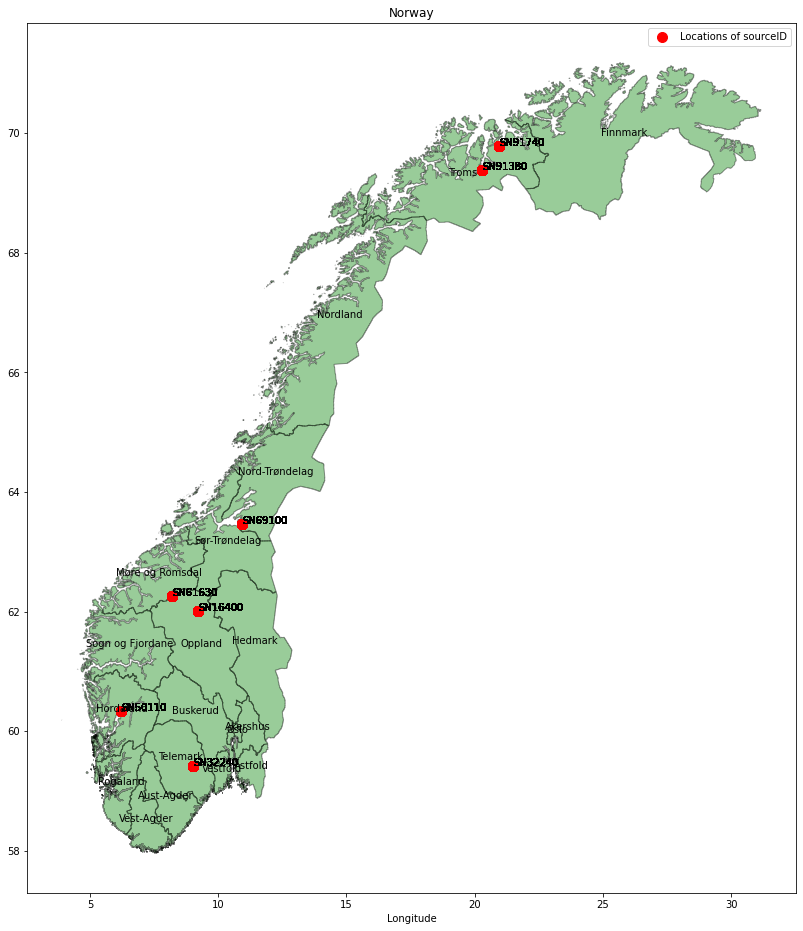

In [31]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

fig, ax = plt.subplots(figsize = (16,16))
#railways.plot(color='moccasin', ax=ax, alpha = 0.4)
#waterways.plot(color='dodgerblue', ax=ax, alpha = 0.4)
#street_map.plot(color='dimgray', ax=ax, alpha = 0.4)
area_shp.plot(color='green', ax=ax, alpha = 0.4, edgecolor='black')
area_shp.apply(lambda x: ax.annotate(s=x['name_1'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
meteo_locs.geometry.plot(marker='o', color='red', markersize=100, ax=ax, label = 'Locations of sourceID')
label_point(meteo.Longitude, meteo.Latitude, meteo.sourceID, meteo.set_index('Longitude')['Latitude'].plot(style='o', color='red', label=''))

plt.title('Norway')
plt.legend(loc='best')

Text(0.5, 1.0, 'Mean Air Temperature')

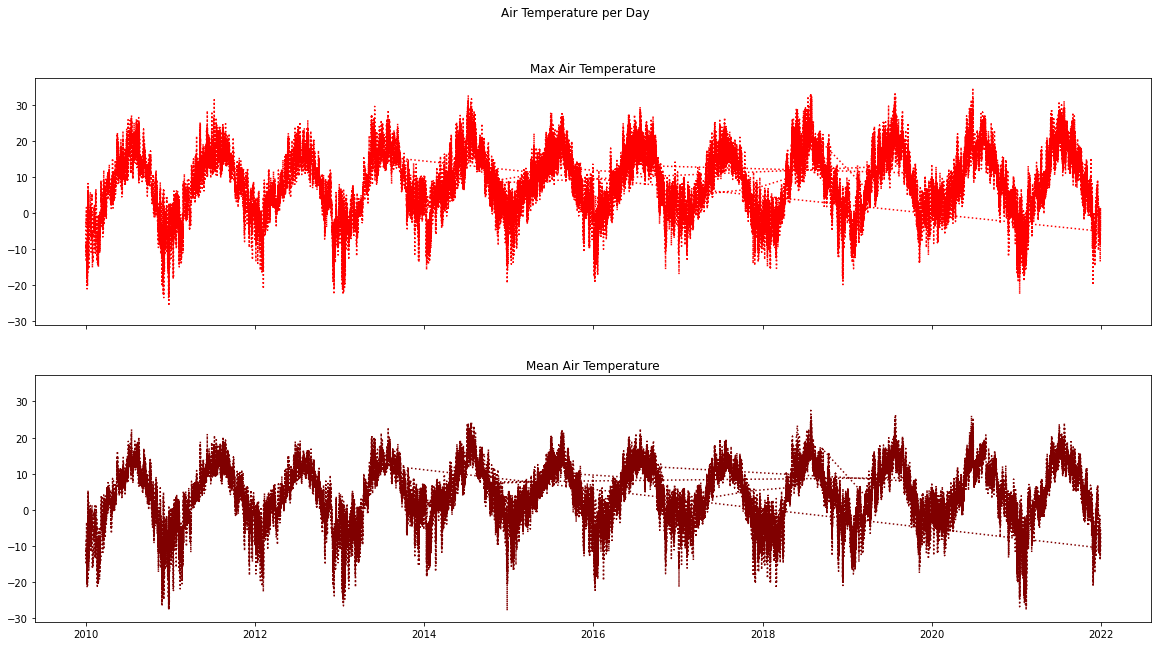

In [32]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day')
axs[0].plot(meteo.Date, meteo.max_air_temp_perday, color='red', ls='dotted')
axs[0].set_title("Max Air Temperature")
axs[1].plot(meteo.Date, meteo.mean_air_temp_perday, color='maroon', ls='dotted')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Relative Humidity')

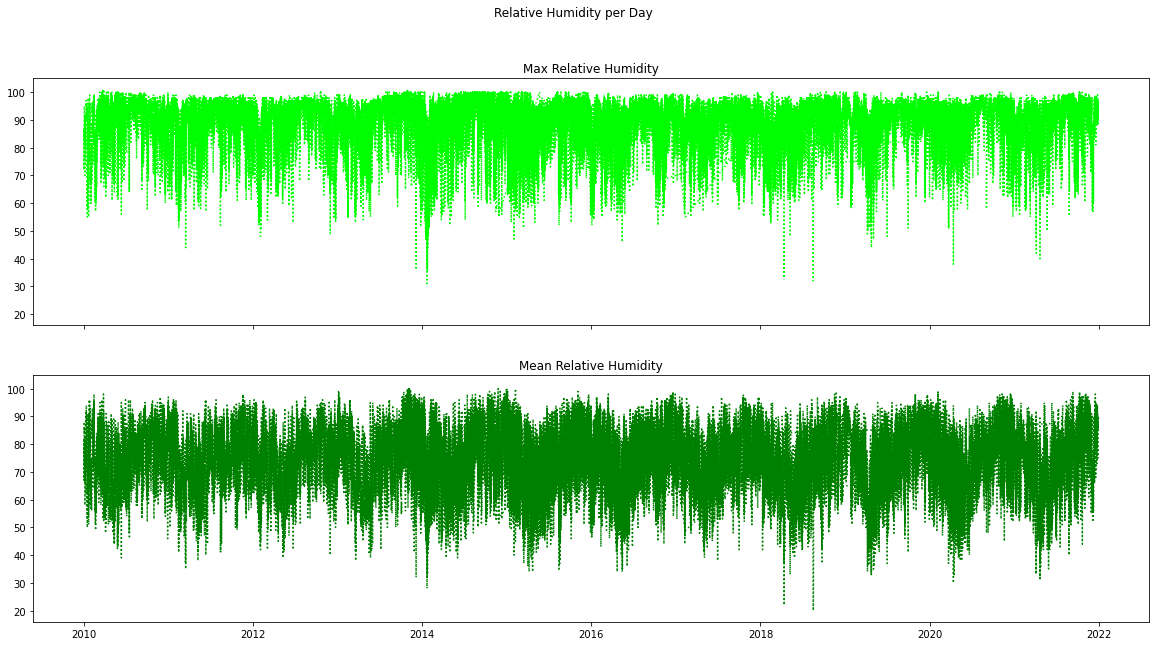

In [33]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Relative Humidity per Day')
axs[0].plot(meteo.Date, meteo.max_rel_hum_perday, color='lime', ls='dotted')
axs[0].set_title("Max Relative Humidity")
axs[1].plot(meteo.Date, meteo.mean_rel_hum_perday, color='green', ls='dotted')
axs[1].set_title("Mean Relative Humidity")

Text(0.5, 1.0, 'Mean Wind Speed')

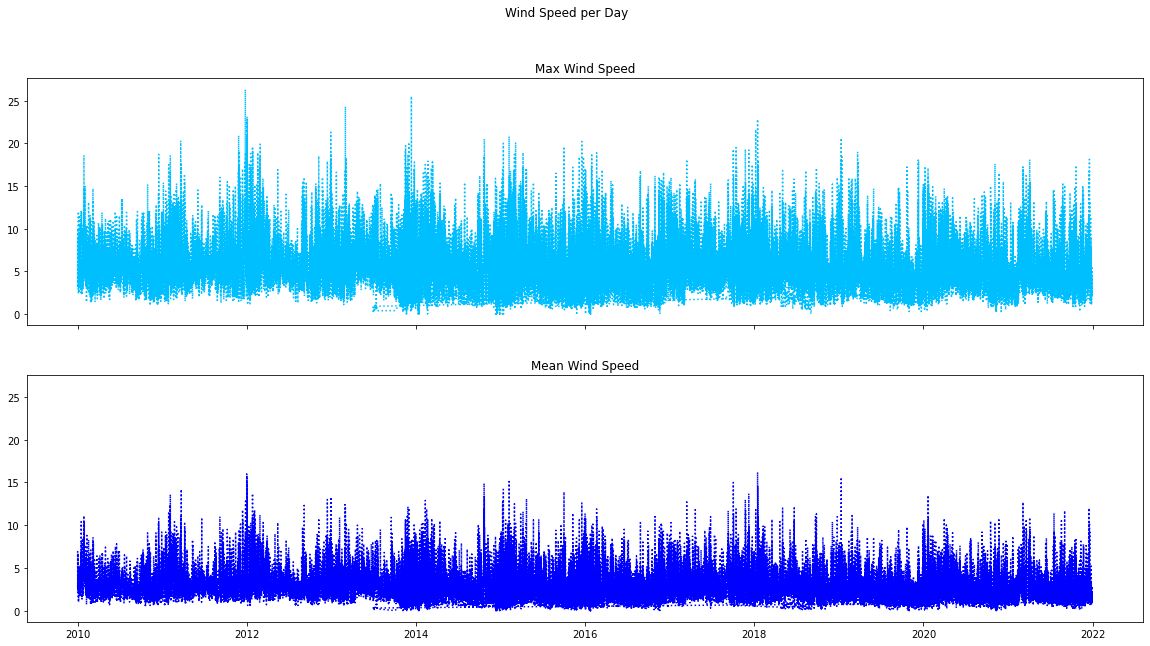

In [34]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Wind Speed per Day')
axs[0].plot(meteo.Date, meteo.max_wind_speed_perday, color='deepskyblue', ls='dotted')
axs[0].set_title("Max Wind Speed")
axs[1].plot(meteo.Date, meteo.mean_wind_speed_perday, color='blue', ls='dotted')
axs[1].set_title("Mean Wind Speed")

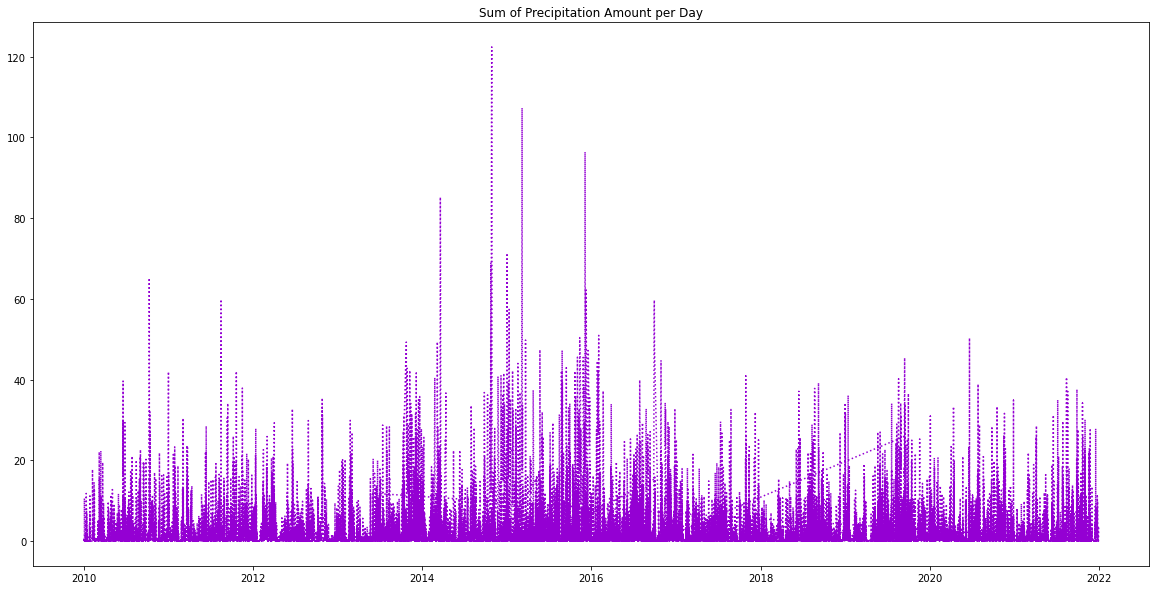

In [35]:
plt.figure(figsize=(20, 10))
plt.title('Sum of Precipitation Amount per Day')
plt.plot(meteo.Date, meteo.sum_precip_amount_perday, color='darkviolet', ls='dotted')
plt.show()

In [36]:
df2010 = meteo[meteo['Year'] == 2010]
df2011 = meteo[meteo['Year'] == 2011]
df2012 = meteo[meteo['Year'] == 2012]
df2013 = meteo[meteo['Year'] == 2013]
df2014 = meteo[meteo['Year'] == 2014]
df2015 = meteo[meteo['Year'] == 2015]
df2016 = meteo[meteo['Year'] == 2016]
df2017 = meteo[meteo['Year'] == 2017]
df2018 = meteo[meteo['Year'] == 2018]
df2019 = meteo[meteo['Year'] == 2019]
df2020 = meteo[meteo['Year'] == 2020]
df2021 = meteo[meteo['Year'] == 2021]

Text(0.5, 1.0, 'Mean Air Temperature')

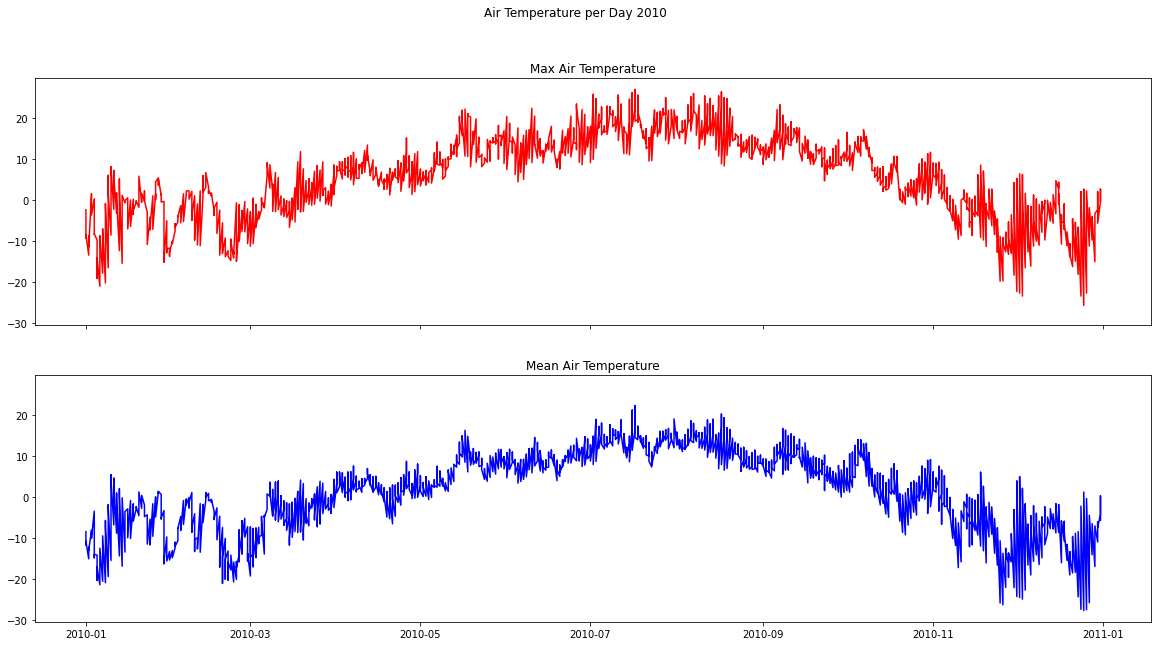

In [37]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2010')
axs[0].plot(df2010.Date, df2010.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2010.Date, df2010.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

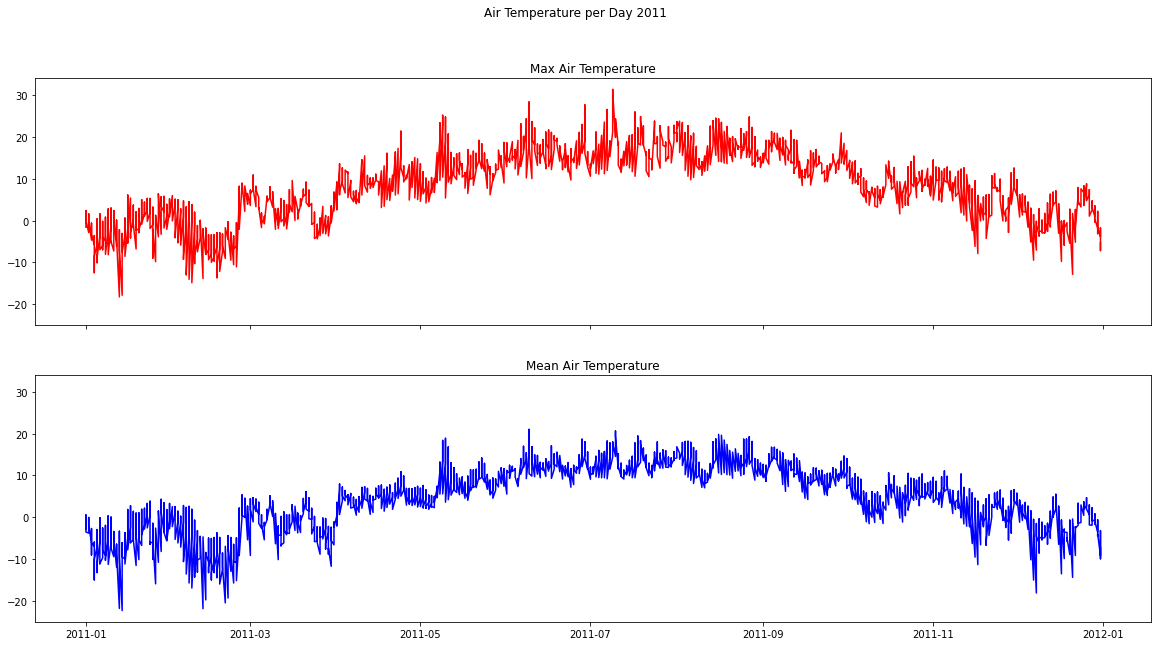

In [38]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2011')
axs[0].plot(df2011.Date, df2011.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2011.Date, df2011.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

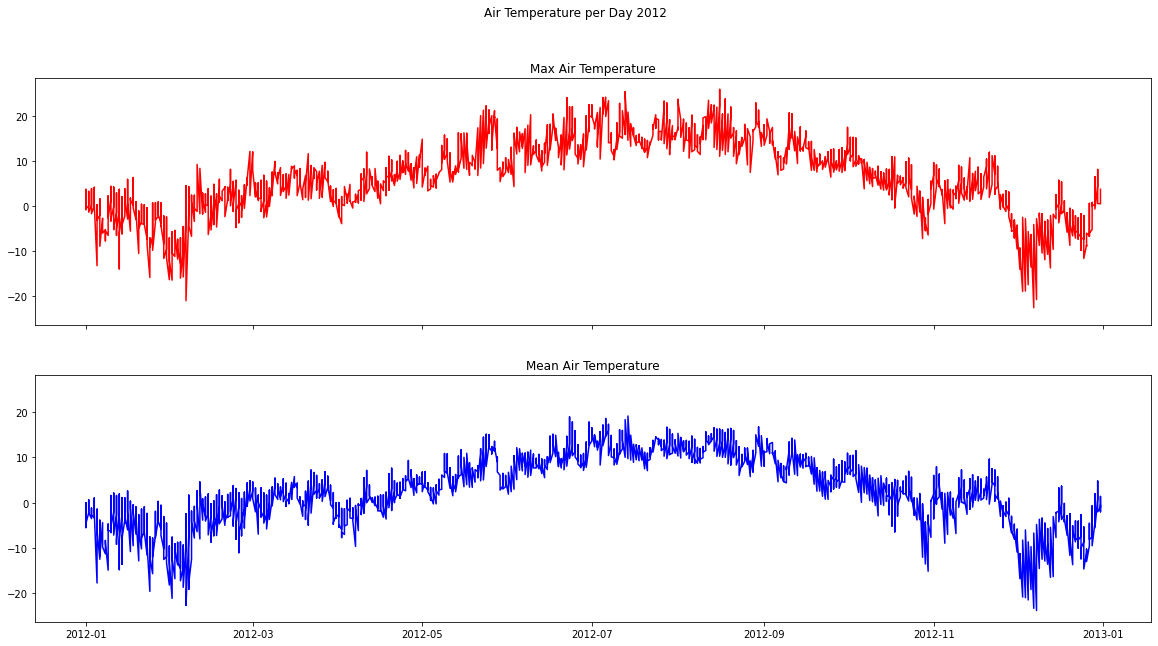

In [39]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2012')
axs[0].plot(df2012.Date, df2012.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2012.Date, df2012.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

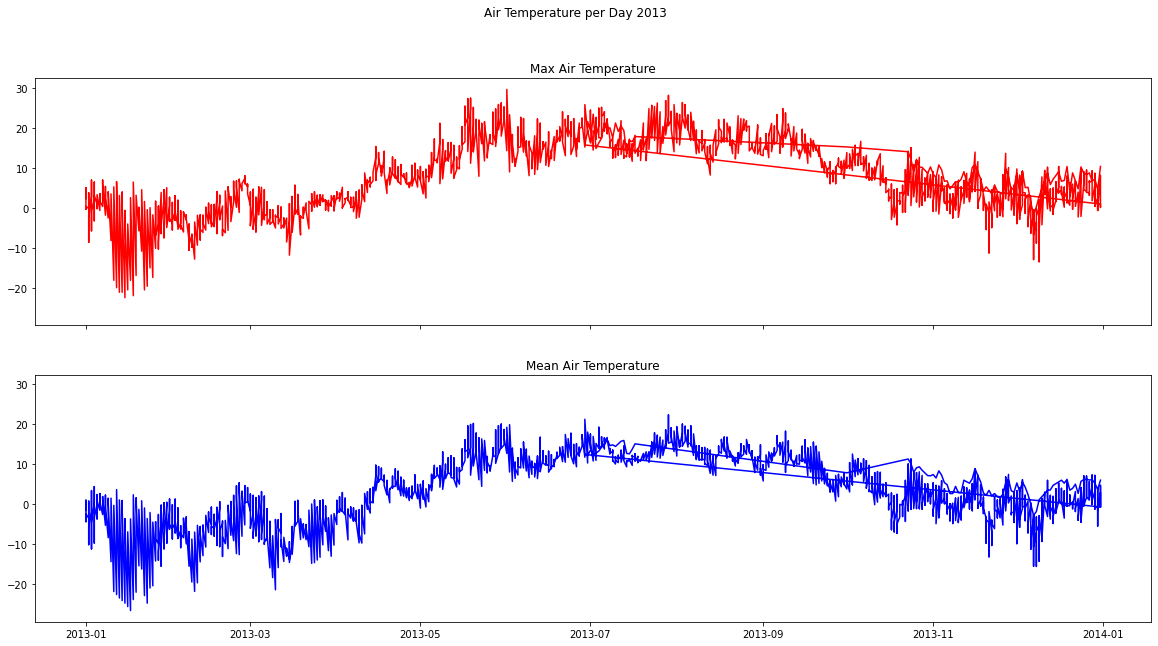

In [40]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2013')
axs[0].plot(df2013.Date, df2013.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2013.Date, df2013.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

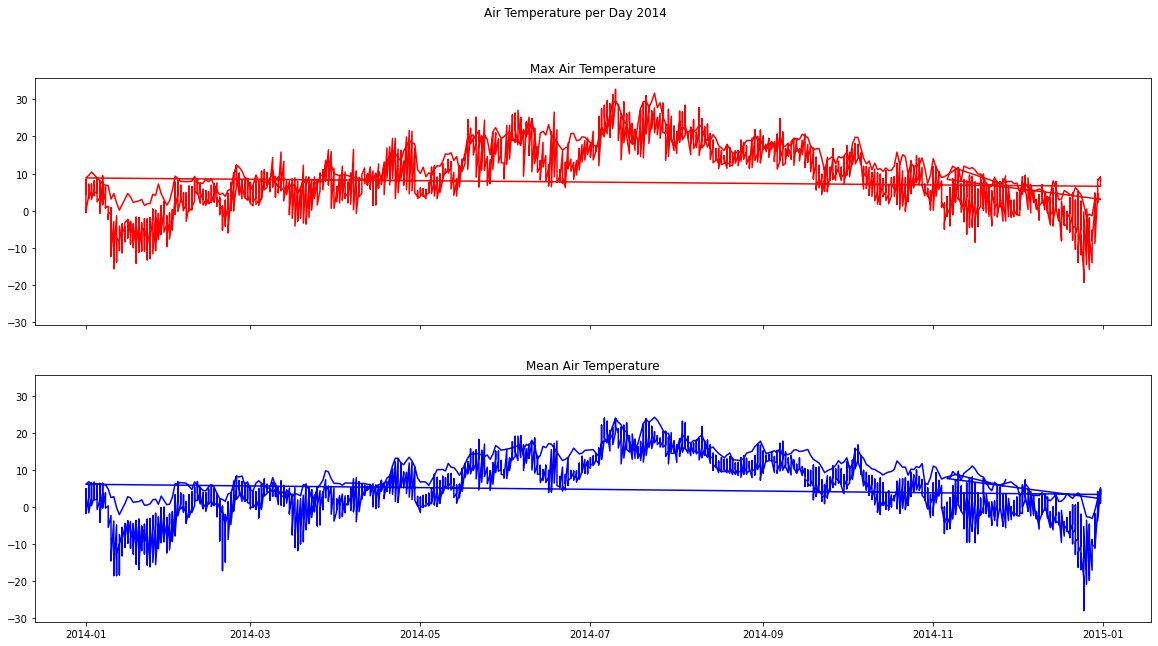

In [41]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2014')
axs[0].plot(df2014.Date, df2014.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2014.Date, df2014.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

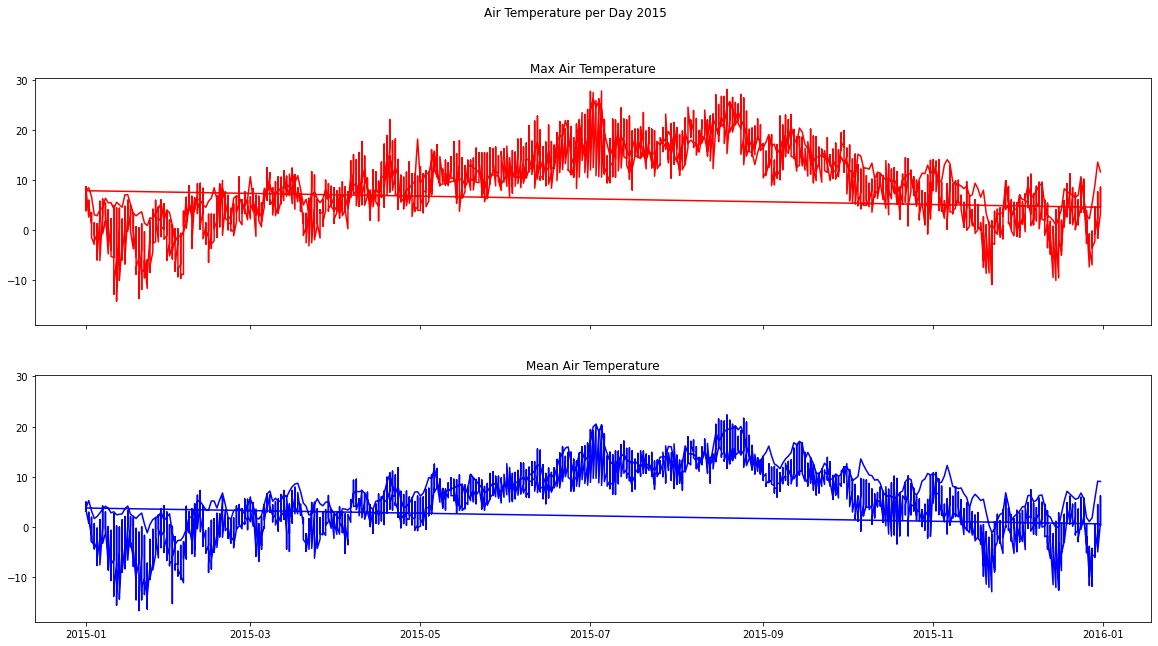

In [42]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2015')
axs[0].plot(df2015.Date, df2015.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2015.Date, df2015.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

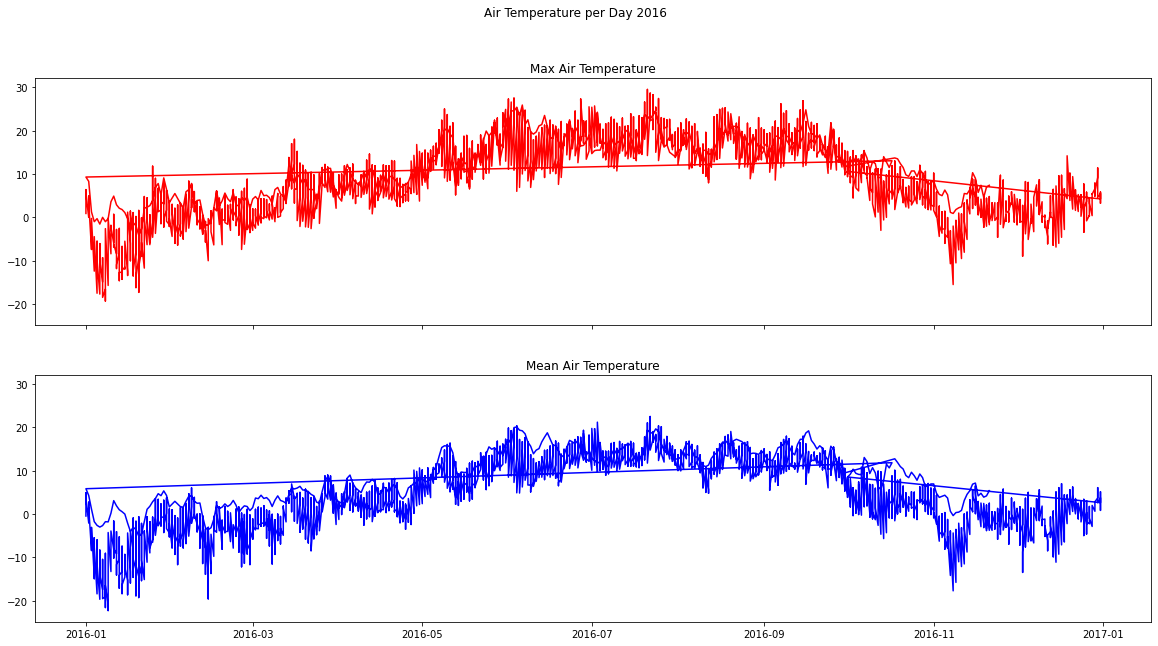

In [43]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2016')
axs[0].plot(df2016.Date, df2016.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2016.Date, df2016.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

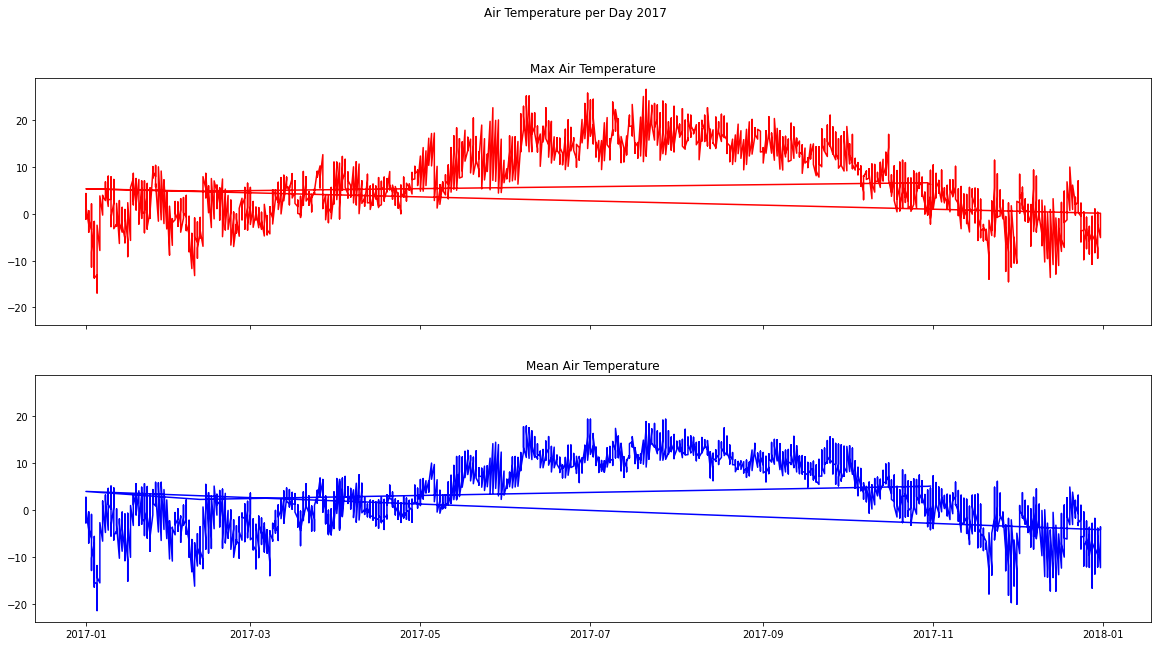

In [44]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2017')
axs[0].plot(df2017.Date, df2017.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2017.Date, df2017.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

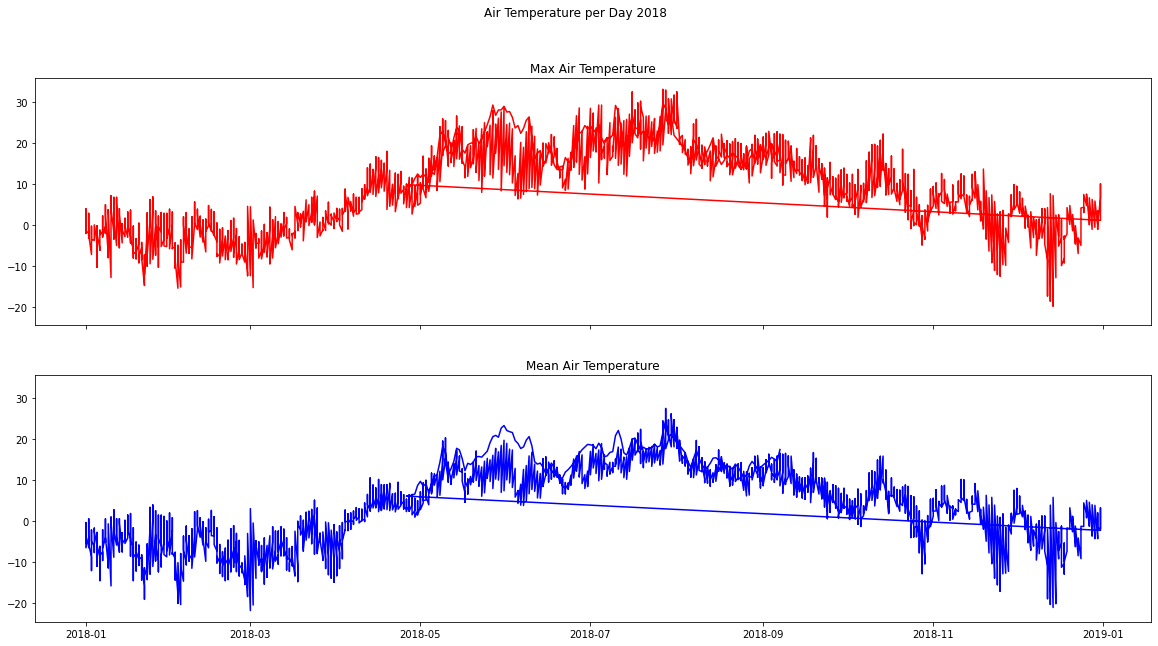

In [45]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2018')
axs[0].plot(df2018.Date, df2018.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2018.Date, df2018.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

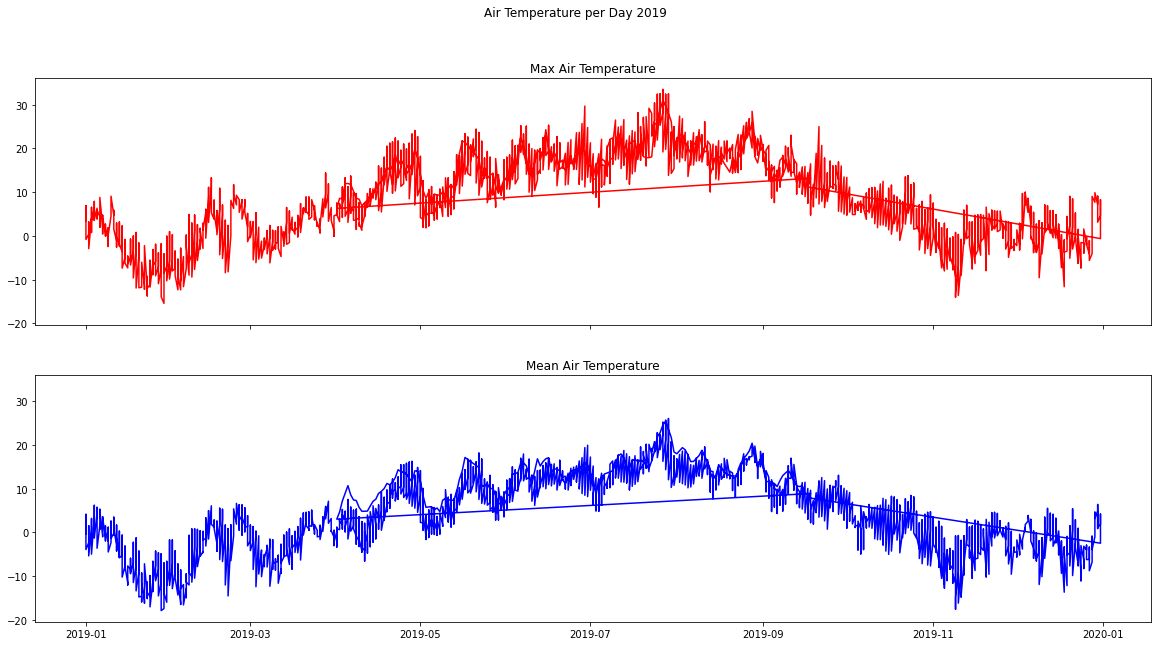

In [46]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2019')
axs[0].plot(df2019.Date, df2019.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2019.Date, df2019.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

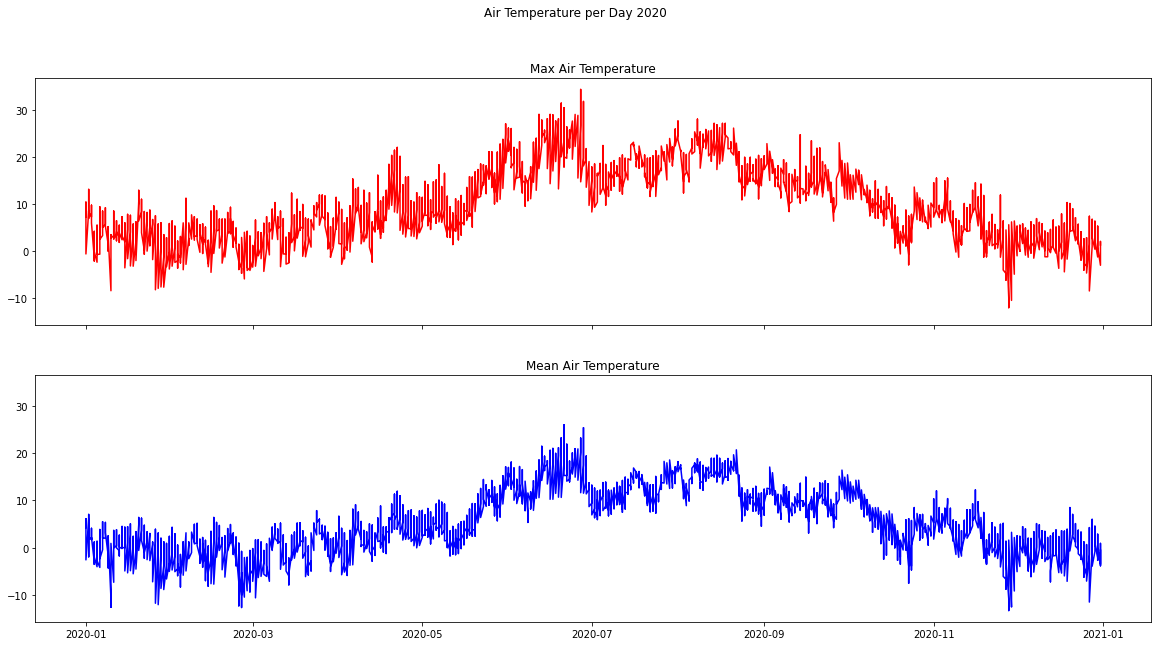

In [47]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2020')
axs[0].plot(df2020.Date, df2020.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2020.Date, df2020.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Air Temperature')

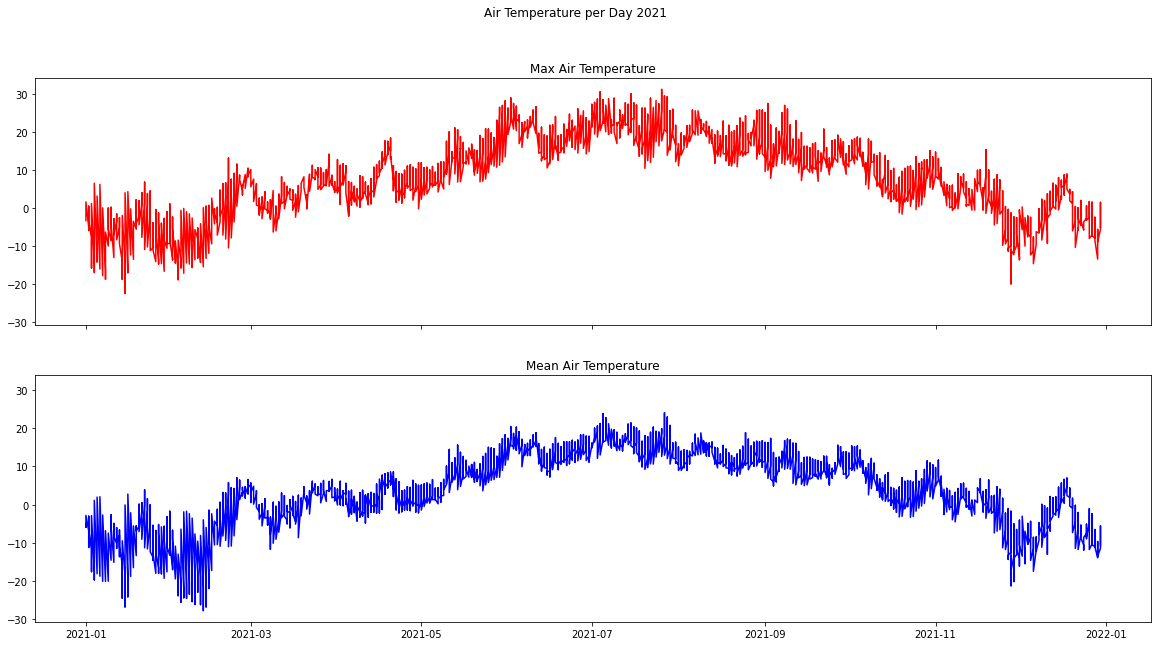

In [48]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day 2021')
axs[0].plot(df2021.Date, df2021.max_air_temp_perday, color='red')
axs[0].set_title("Max Air Temperature")
axs[1].plot(df2021.Date, df2021.mean_air_temp_perday, color='blue')
axs[1].set_title("Mean Air Temperature")

In [49]:
meteo.loc[meteo['max_air_temp_perday'].idxmax()]

sourceID                                    SN69100
Latitude                                    63.4597
Longitude                                   10.9305
max_air_temp_perday                            34.3
max_rel_hum_perday                             87.0
max_wind_speed_perday                           5.7
mean_air_temp_perday                          23.25
mean_rel_hum_perday                            54.0
mean_wind_speed_perday                          3.3
sum_precip_amount_perday                        0.0
Day                                              27
Month                                             6
Year                                           2020
geometry                    POINT (10.9305 63.4597)
Date                            2020-06-27 00:00:00
Name: 176214, dtype: object

In [50]:
meteo.loc[meteo['max_rel_hum_perday'].idxmax()]

sourceID                                SN61630
Latitude                                62.2583
Longitude                                   8.2
max_air_temp_perday                         7.1
max_rel_hum_perday                        101.0
max_wind_speed_perday                       4.1
mean_air_temp_perday                      -0.05
mean_rel_hum_perday                        75.0
mean_wind_speed_perday                      1.7
sum_precip_amount_perday                   0.95
Day                                          24
Month                                         3
Year                                       2010
geometry                    POINT (8.2 62.2583)
Date                        2010-03-24 00:00:00
Name: 3804, dtype: object

In [51]:
meteo.loc[meteo['max_wind_speed_perday'].idxmax()]

sourceID                                    SN69100
Latitude                                    63.4597
Longitude                                   10.9305
max_air_temp_perday                             8.8
max_rel_hum_perday                             88.0
max_wind_speed_perday                          26.3
mean_air_temp_perday                           4.65
mean_rel_hum_perday                            78.0
mean_wind_speed_perday                          9.3
sum_precip_amount_perday                        7.8
Day                                              26
Month                                            12
Year                                           2011
geometry                    POINT (10.9305 63.4597)
Date                            2011-12-26 00:00:00
Name: 33338, dtype: object

In [52]:
meteo.loc[meteo['sum_precip_amount_perday'].idxmax()]

sourceID                                   SN50110
Latitude                                   60.3372
Longitude                                   6.2175
max_air_temp_perday                           14.2
max_rel_hum_perday                           100.0
max_wind_speed_perday                          2.0
mean_air_temp_perday                         11.75
mean_rel_hum_perday                           96.0
mean_wind_speed_perday                         1.2
sum_precip_amount_perday                     122.4
Day                                             28
Month                                           10
Year                                          2014
geometry                    POINT (6.2175 60.3372)
Date                           2014-10-28 00:00:00
Name: 229761, dtype: object

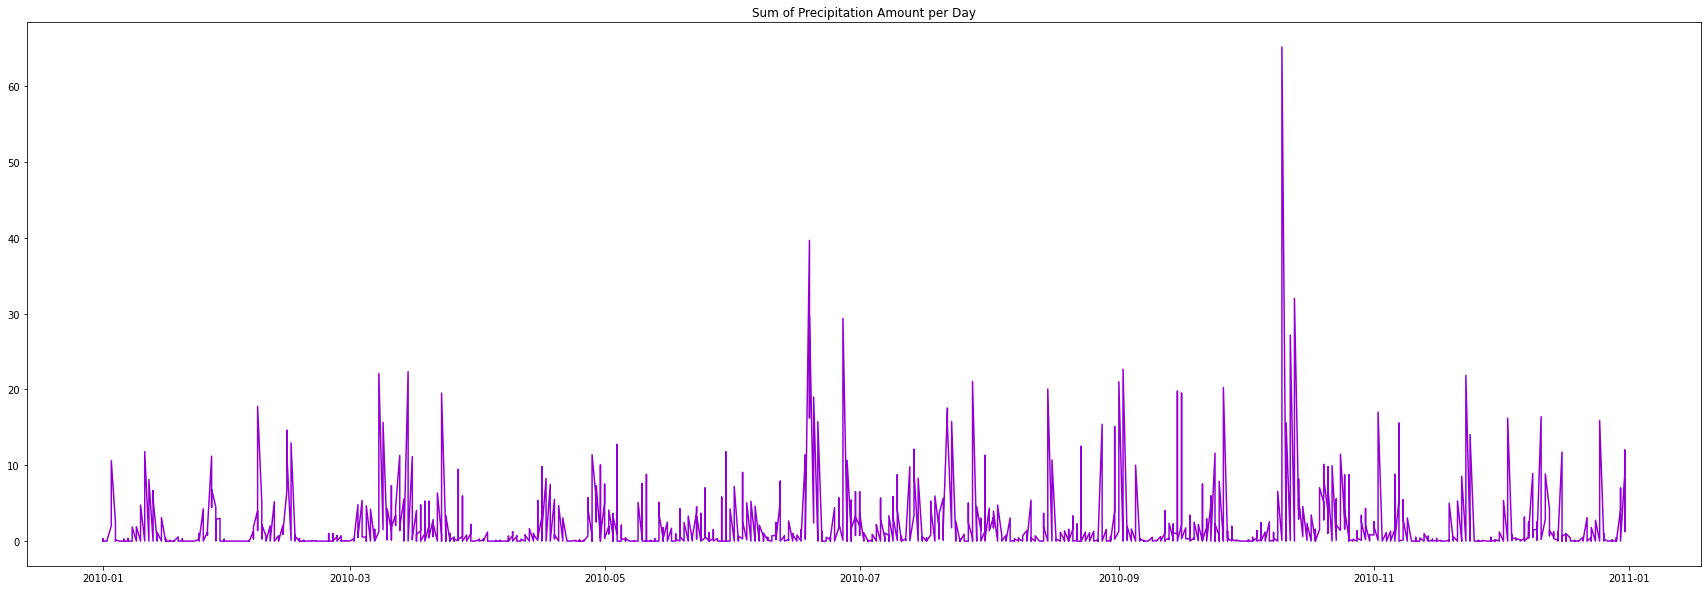

In [53]:
plt.figure(figsize=(30, 10))
plt.title('Sum of Precipitation Amount per Day')
plt.plot(df2010.Date, df2010.sum_precip_amount_perday, color='darkviolet')
plt.show()

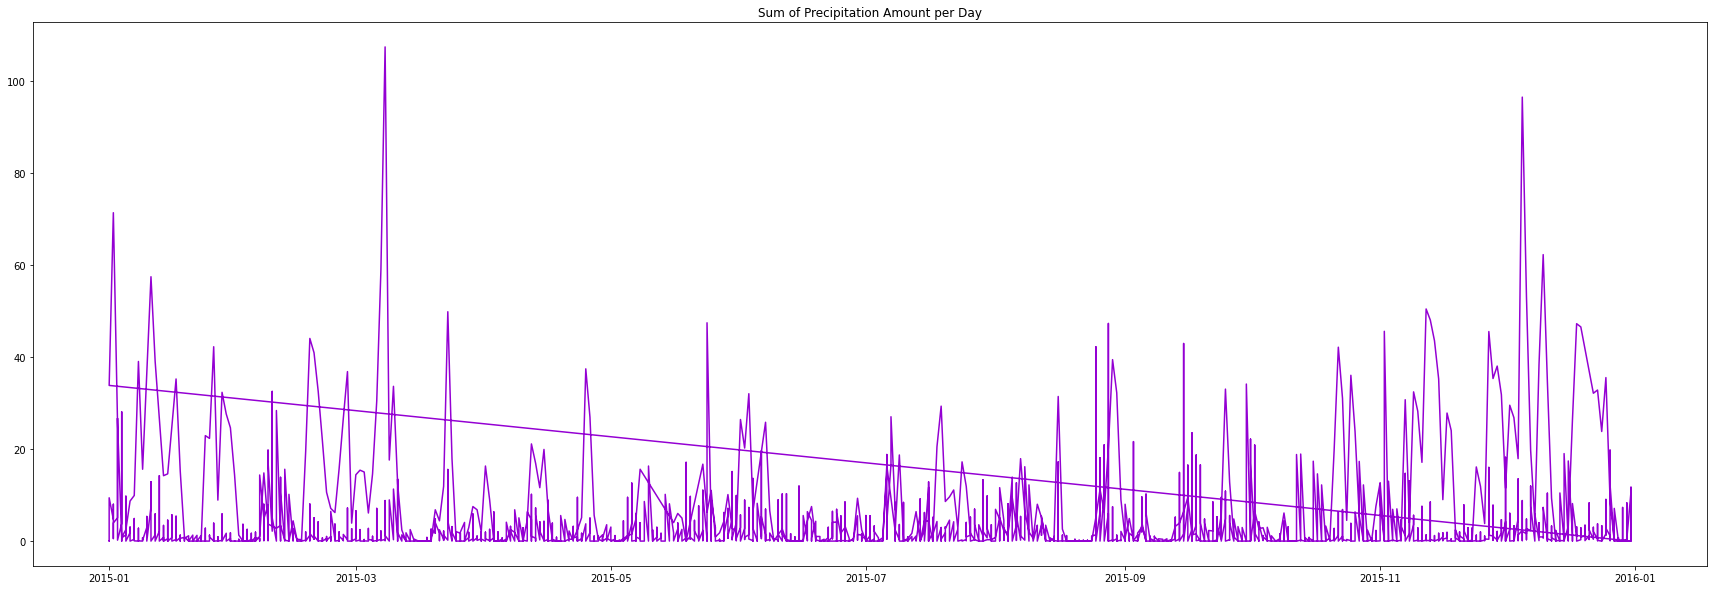

In [54]:
plt.figure(figsize=(30, 10))
plt.title('Sum of Precipitation Amount per Day')
plt.plot(df2015.Date, df2015.sum_precip_amount_perday, color='darkviolet')
plt.show()

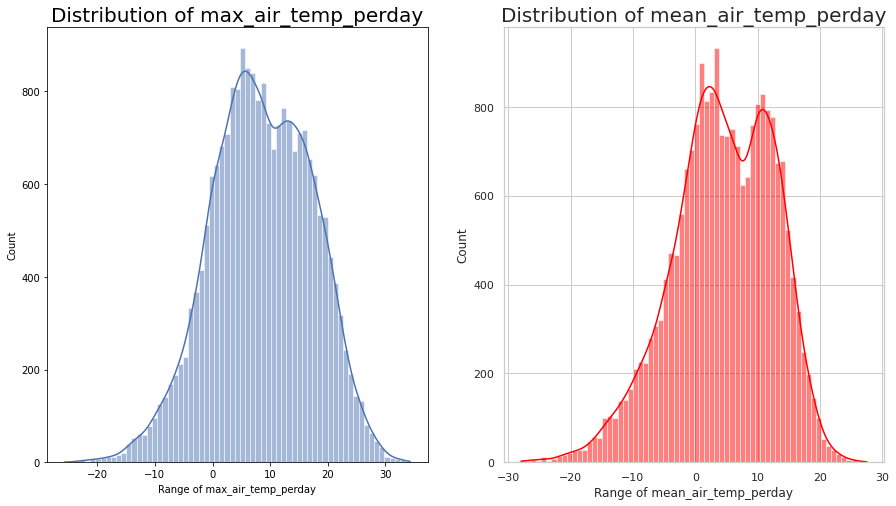

In [55]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo['max_air_temp_perday'], kde=True)
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo['mean_air_temp_perday'], color = 'red', kde=True)
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')
plt.show()

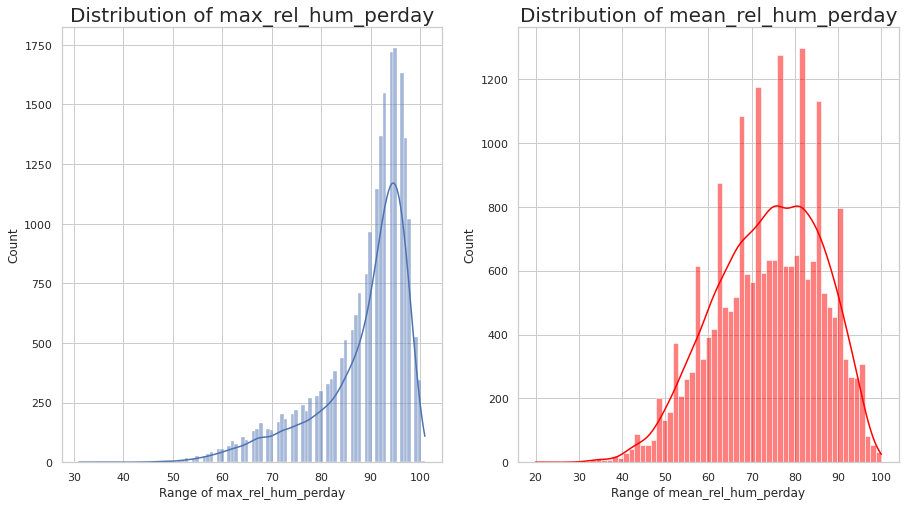

In [56]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo['max_rel_hum_perday'], kde=True)
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo['mean_rel_hum_perday'], color = 'red', kde=True)
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')
plt.show()

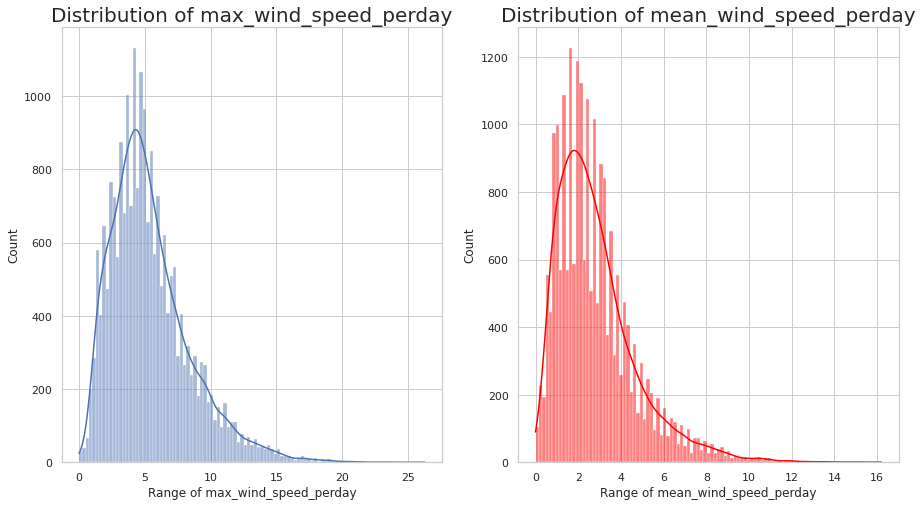

In [57]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo['max_wind_speed_perday'], kde=True)
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo['mean_wind_speed_perday'], color = 'red', kde=True)
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')
plt.show()

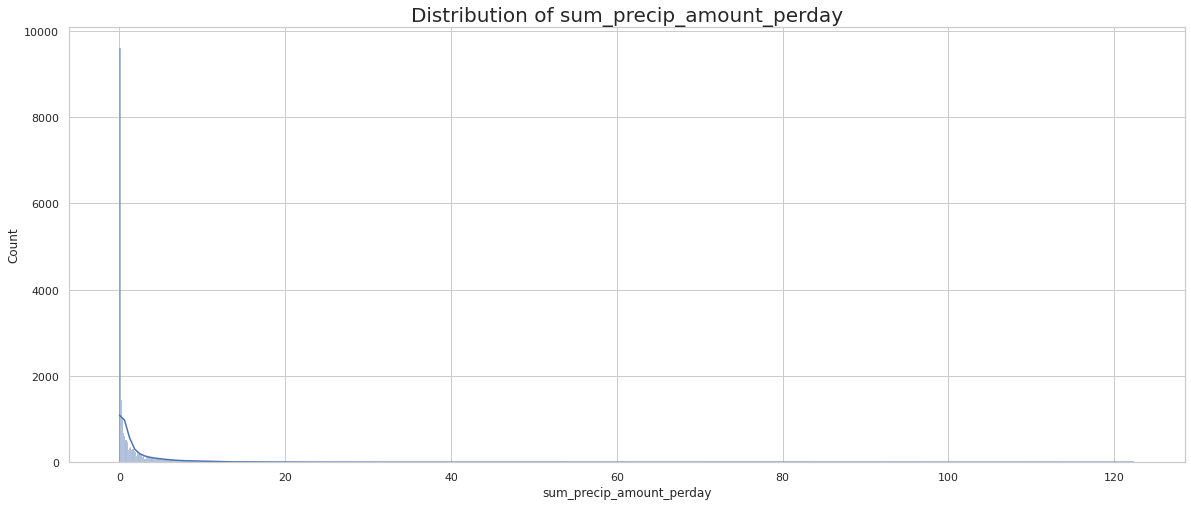

In [58]:
plt.figure(figsize=(20,8))
sns.histplot(meteo['sum_precip_amount_perday'], kde=True)
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)
plt.show()

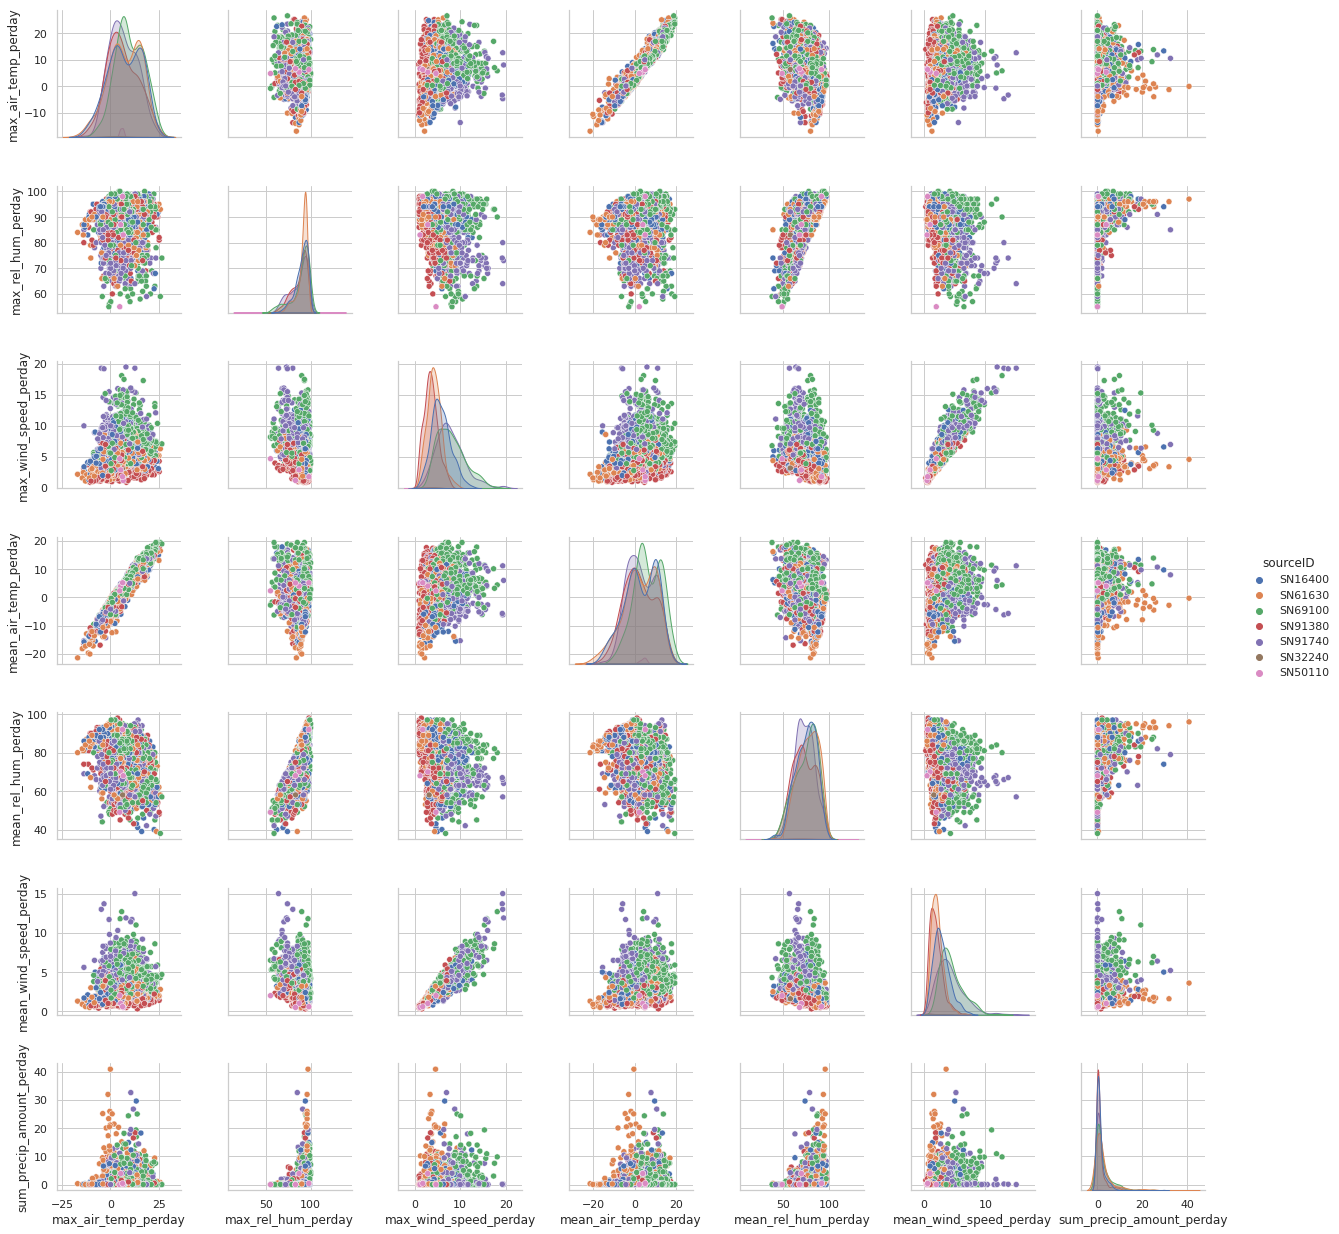

In [59]:
sns.pairplot(df2017.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1), hue='sourceID')

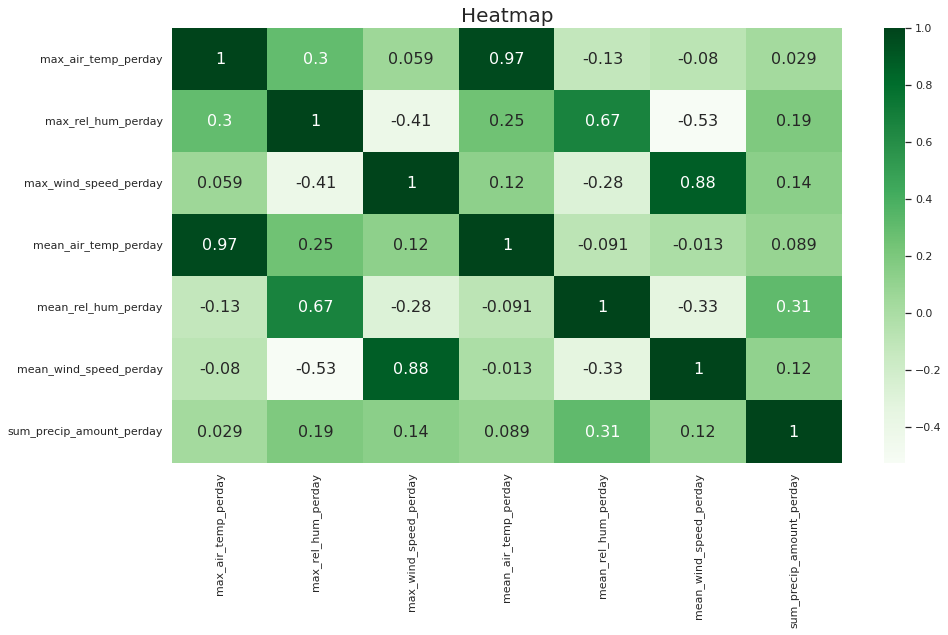

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(df2010.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1).corr(), cmap = 'Greens', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

In [61]:
x = meteo.iloc[:, [5, 6]].values
x

array([[  4.1 ,  -8.5 ],
       [  5.1 , -11.75],
       [  8.9 , -10.9 ],
       ...,
       [  1.5 ,  10.5 ],
       [  2.2 ,  10.7 ],
       [  1.6 ,   8.75]])

Text(0, 0.5, 'wcss')

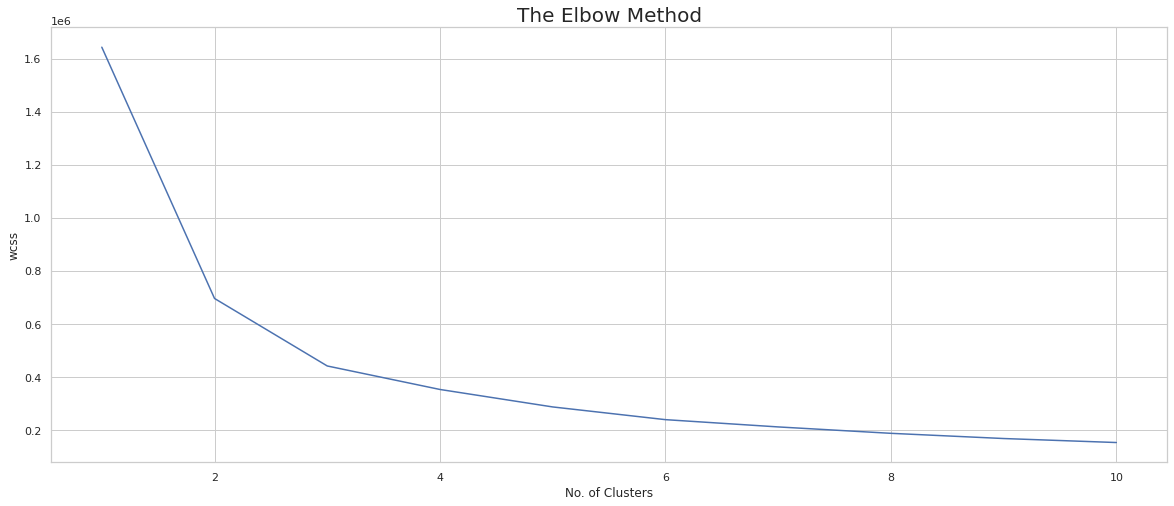

In [62]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

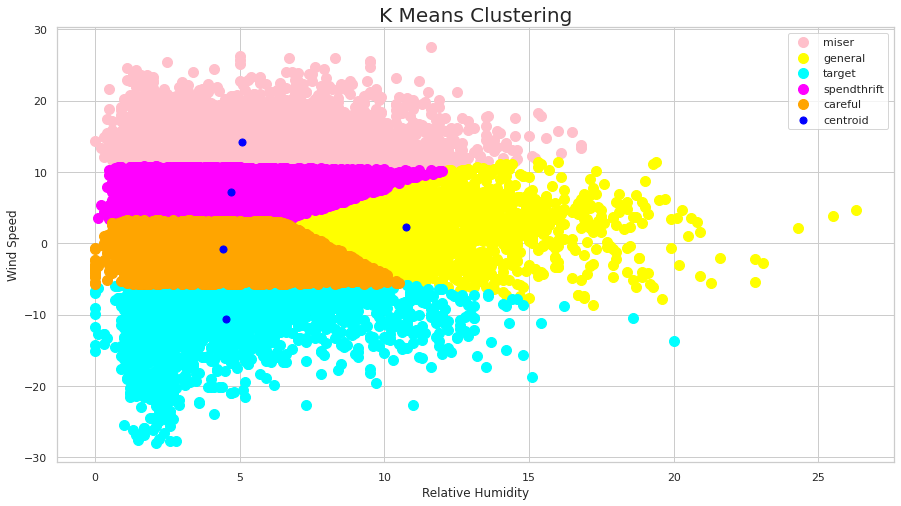

In [63]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Relative Humidity')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()